In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pathlib import Path
mpl.rcParams['figure.figsize'] = (14,9)
data_path = Path.cwd().parent
data_path

PosixPath('/home/user/work/specialist')

# Adaptive line neuron

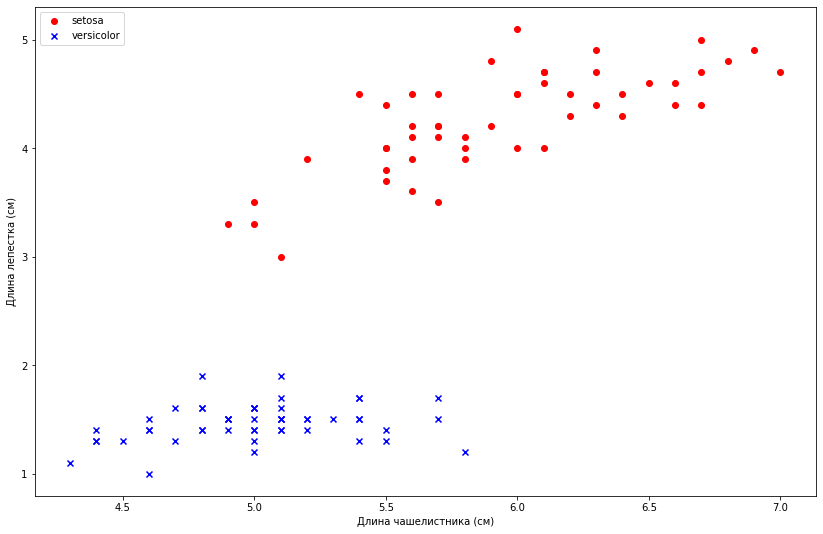

In [2]:
data_path = Path.cwd().parent / "notebooks" / 'data'/ 'iris.data'
data = pd.read_csv(data_path, header=None)

# Выбираем два сорта и задаем метки -1, 1
y = data.iloc[:,4].values
idx = (y == 'Iris-setosa') | (y == 'Iris-versicolor')
y = y[idx]
y = np.where(y == 'Iris-setosa', -1, 1)

# Массив признаков
X = data.iloc[idx, [0,2]].values
setosa = y == 1
versic =y == -1

# Строим графики
plt.scatter(X[setosa,0], X[setosa,1], color='red', marker='o', label='setosa')
plt.scatter(X[versic,0], X[versic,1], color='blue', marker='x', label='versicolor')
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
plt.legend(loc='upper left')

### Значение функции штрафа
$$ J(\mathbf{w}) = \frac{1}{2} \sum\limits_i \left( y^{(i)} - \phi\left(z^{(i)}\right)\right)^2$$

### Градиент
$$\nabla J(\mathbf{w}) = \sum\limits_i \left ( y^{(i)} - \phi\left(z^{(i)} \right) \right) \mathbf{x}^{(i)} $$

In [4]:
from AdalineGD import AdalineGD

# Обучение персептрона

In [5]:
# обучающее отношение примем 0.1
ada1 = AdalineGD(eta = 0.01, n_iter = 30)
ada1.fit(X,y)

Text(0, 0.5, 'Количество ошибок')

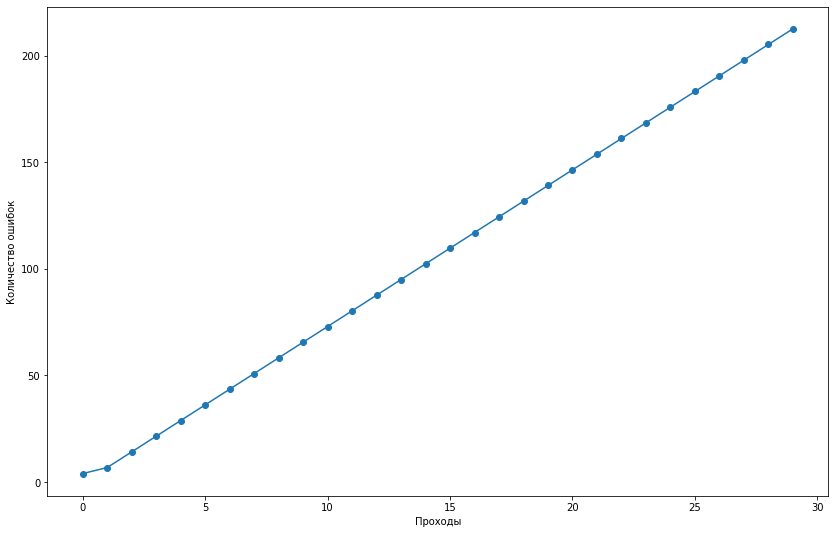

In [6]:
plt.plot(np.log(ada1.cost_),marker='o')
plt.xlabel('Проходы')
plt.ylabel('Количество ошибок')

Text(0, 0.5, 'Количество ошибок')

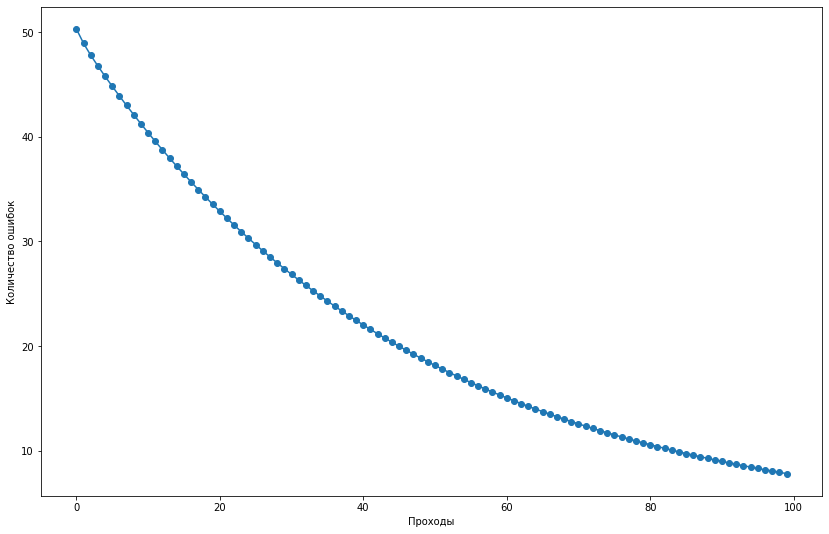

In [7]:
ada1 = AdalineGD(eta = 0.0001, n_iter = 100)
ada1.fit(X,y)

plt.plot(ada1.cost_,marker='o')
plt.xlabel('Проходы')
plt.ylabel('Количество ошибок')

### Масштабируем признаки

In [24]:
X_mean = X.mean(0)
X -= X_mean

# Считаем СКО
X /= X.std(0)

In [25]:
X.mean(0)

array([ 5.55111512e-18, -6.88338275e-17])

In [26]:
X.std(0)

array([1., 1.])

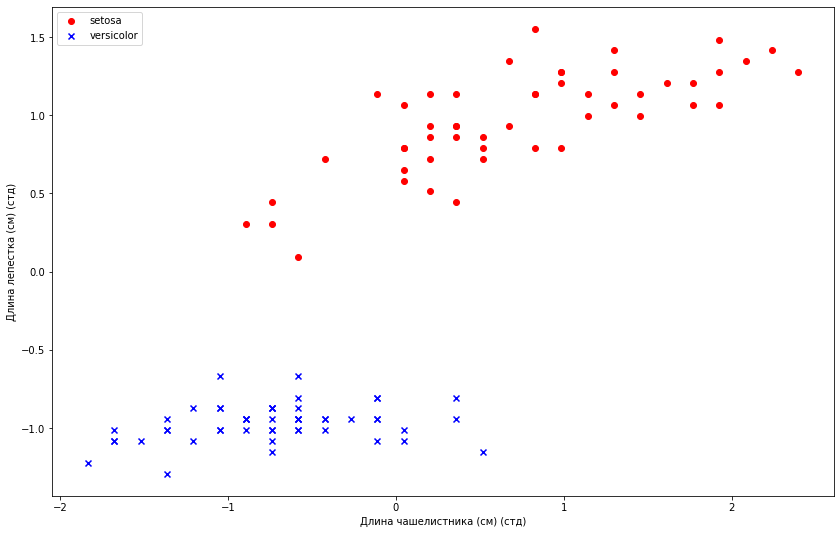

In [27]:
plt.scatter(X[setosa,0], X[setosa,1], color='red', marker='o', label='setosa')
plt.scatter(X[versic,0], X[versic,1], color='blue', marker='x', label='versicolor')
plt.xlabel('Длина чашелистника (см) (стд)')
plt.ylabel('Длина лепестка (см) (стд)')
plt.legend(loc='upper left')

Text(0, 0.5, 'Количество ошибок')

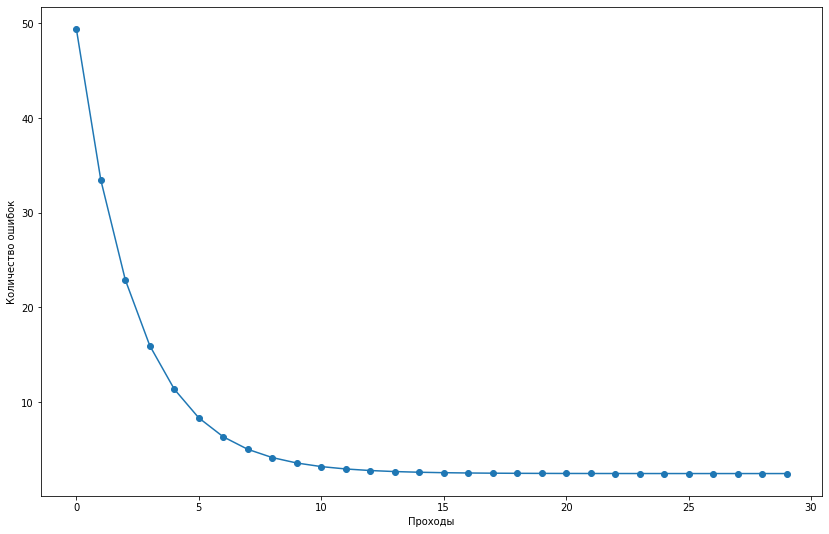

In [29]:
ada2 = AdalineGD(eta = 0.01, n_iter = 30)
ada2.fit(X,y)

plt.plot(ada2.cost_,marker='o')
plt.xlabel('Проходы')
plt.ylabel('Количество ошибок')

In [30]:
ada1.cost_[-1]

2.598061969603784

In [31]:
ada2.cost_[-1]

2.4356758641677994

In [32]:
from Regions import plot_decision_regions

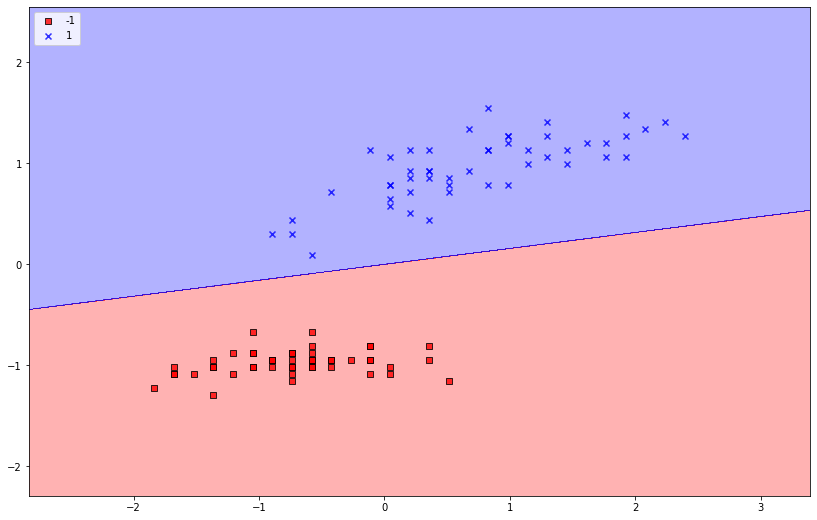

In [36]:
plot_decision_regions(X, y, ada2 , resolution = 0.002)
plt.legend(loc = 'upper left')